In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import neural_network
neural_network.__all__

['BernoulliRBM', 'MLPClassifier', 'MLPRegressor']

In [17]:
# 准备数据
xigua = pd.read_csv("../data/xigua3.0.csv", index_col=0)
xigua_2_data = xigua[['密度', '含糖率']]
xigua_2_target = xigua[['好瓜']].replace({'是': 1, '否': -1})
scale = 100
x = np.linspace(0, 1, scale + 1)
y = np.linspace(0, 1, scale + 1)
x, y = np.meshgrid(x, y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
xigua_2_data, xigua_2_target

(       密度    含糖率
 编号              
 1   0.697  0.460
 2   0.774  0.376
 3   0.634  0.264
 4   0.608  0.318
 5   0.556  0.215
 6   0.403  0.237
 7   0.481  0.149
 8   0.437  0.211
 9   0.666  0.091
 10  0.243  0.267
 11  0.245  0.057
 12  0.343  0.099
 13  0.639  0.161
 14  0.657  0.198
 15  0.360  0.370
 16  0.593  0.042
 17  0.719  0.103,
     好瓜
 编号    
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9   -1
 10  -1
 11  -1
 12  -1
 13  -1
 14  -1
 15  -1
 16  -1
 17  -1)

0.6470588235294118


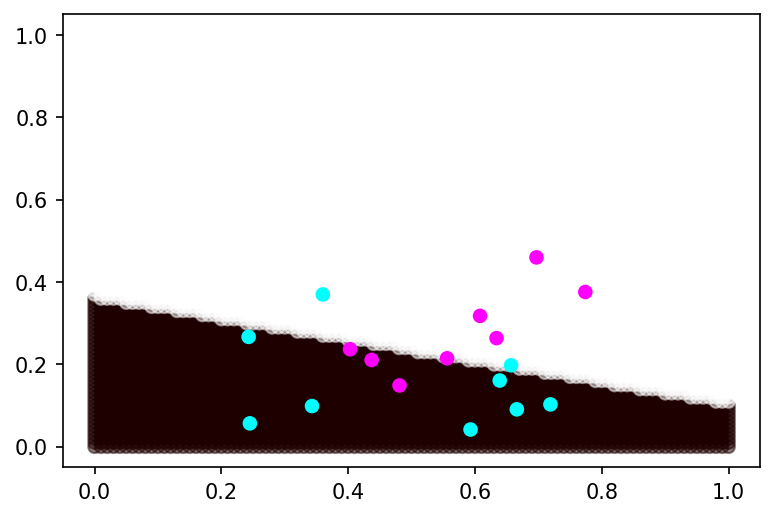

In [23]:
# 使用线性模型，画出分类面
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=234, solver='liblinear', max_iter=10000, C=100)
model.fit(xigua_2_data.values, xigua_2_target.values.flatten())
print(model.score(xigua_2_data.values, xigua_2_target.values.flatten()))
disp_predict = model.predict(disp_input)

plt.rcParams['figure.dpi'] = 150
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='pink', alpha=0.5)
plt.scatter(xigua_2_data[['密度']], xigua_2_data[['含糖率']], c=xigua_2_target.values.flatten(), cmap='cool')
plt.show()


0.8823529411764706


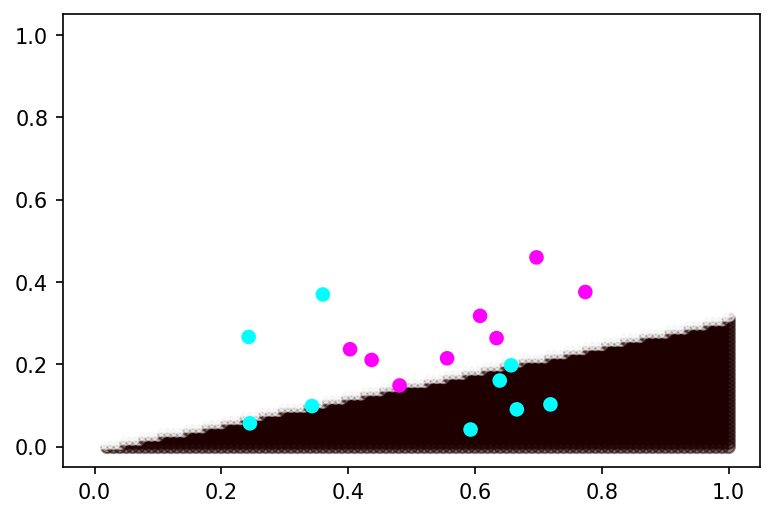

In [43]:
# 使用感知机，画出相同的分类面
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=123,
                      max_iter=100000,
                      hidden_layer_sizes=(1),
                      activation='logistic',
                      solver='lbfgs',
                      shuffle=False,
                      alpha=1e-5)
model.fit(xigua_2_data.values, xigua_2_target.values.flatten())
print(model.score(xigua_2_data.values, xigua_2_target.values.flatten()))
disp_predict = model.predict(disp_input)

plt.rcParams['figure.dpi'] = 150
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='pink', alpha=0.5)
plt.scatter(xigua_2_data[['密度']], xigua_2_data[['含糖率']], c=xigua_2_target.values.flatten(), cmap='cool')
plt.show()


1.0


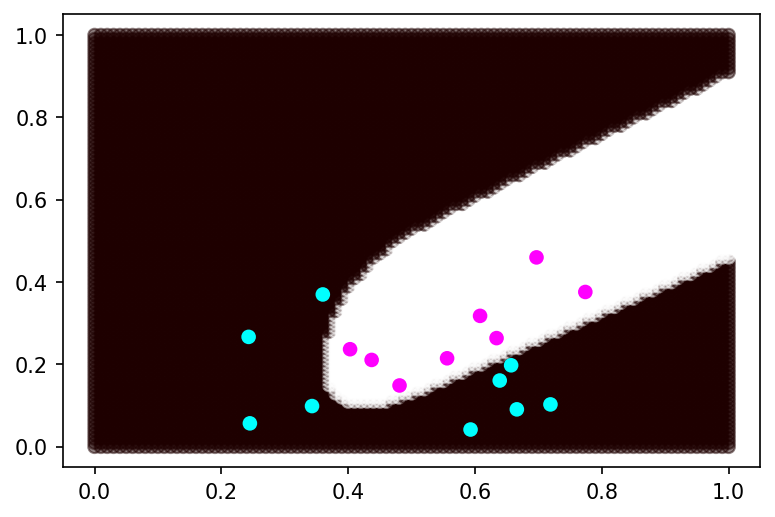

In [44]:
# 使用双层MLP，画出非线性分类面
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=123,
                      max_iter=100000,
                      hidden_layer_sizes=(10),
                      activation='logistic',
                      solver='lbfgs',
                      shuffle=False,
                      alpha=1e-5)
model.fit(xigua_2_data.values, xigua_2_target.values.flatten())
print(model.score(xigua_2_data.values, xigua_2_target.values.flatten()))
disp_predict = model.predict(disp_input)

plt.rcParams['figure.dpi'] = 150
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='pink', alpha=0.5)
plt.scatter(xigua_2_data[['密度']], xigua_2_data[['含糖率']], c=xigua_2_target.values.flatten(), cmap='cool')
plt.show()


0.5294117647058824


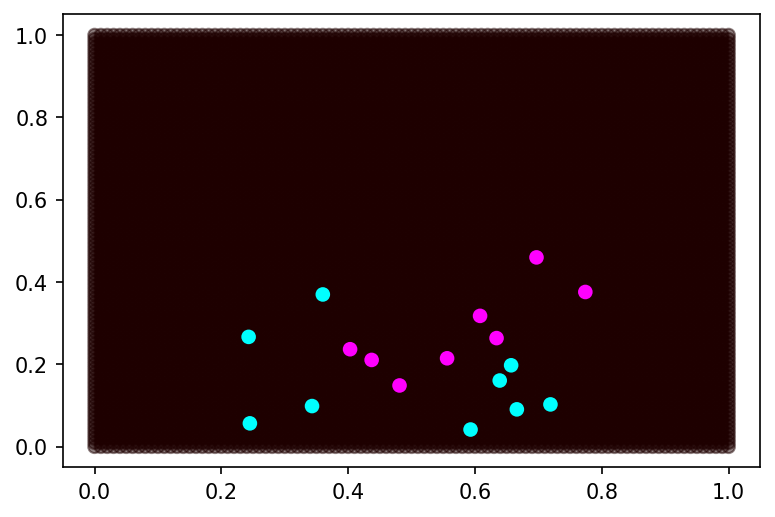

In [47]:
# 使用深层网络，观察梯度消失
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=123,
                      max_iter=100000,
                      hidden_layer_sizes=(100,50,10,10),
                      activation='logistic',
                      solver='lbfgs',
                      shuffle=False,
                      alpha=1e-5)
model.fit(xigua_2_data.values, xigua_2_target.values.flatten())
print(model.score(xigua_2_data.values, xigua_2_target.values.flatten()))
disp_predict = model.predict(disp_input)

plt.rcParams['figure.dpi'] = 150
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='pink', alpha=0.5)
plt.scatter(xigua_2_data[['密度']], xigua_2_data[['含糖率']], c=xigua_2_target.values.flatten(), cmap='cool')
plt.show()
